<div>
<h1 align="center">Stocks project</h1>
<h2 align="center"> By: Hans Michael Célestin </h2>
<br>

</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import scipy.stats as pearsonr
from pandas_datareader import data, wb, DataReader
import numpy as np
from datetime import datetime
from __future__ import division


In [2]:
tech_list= ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [3]:
end = datetime.now()
start = datetime(end.year-1,end.month, end.day)

In [4]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [5]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,117.721096,114.662151,116.295907,116.219691,1.282845e+08,115.783792
std,16.443475,16.011418,16.364811,16.199845,5.247765e+07,16.299346
min,79.125000,77.580002,78.292503,78.285004,4.669130e+07,77.761040
25%,112.154999,108.720001,110.402500,110.209999,9.032360e+07,109.669746
50%,121.480003,118.620003,120.070000,120.089996,1.129452e+08,119.886360
75%,129.735001,126.785000,128.580002,128.000004,1.533652e+08,127.752335
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.704010


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-05-18 to 2021-05-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    float64
 5   Adj Close  251 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


<AxesSubplot:xlabel='Date'>

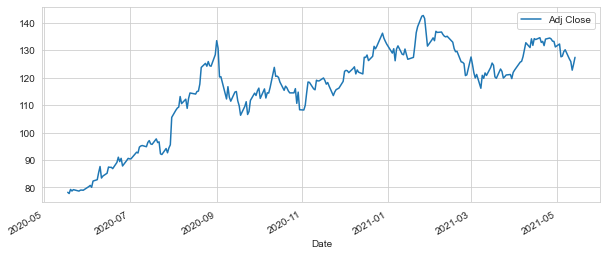

In [7]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

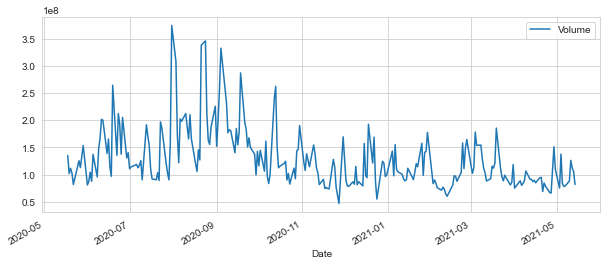

In [8]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))



In [9]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name ='MA for %s days'%(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

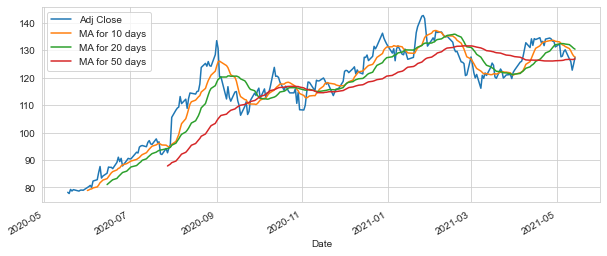

In [10]:
AAPL[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

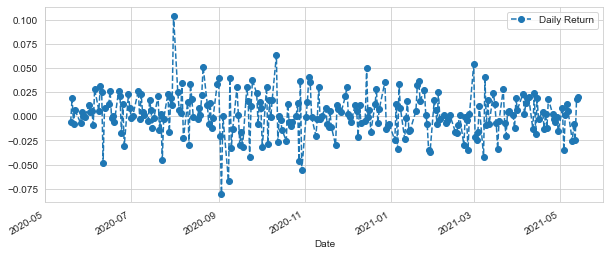

In [11]:
AAPL['Daily Return'] =AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

C:\Users\hansm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

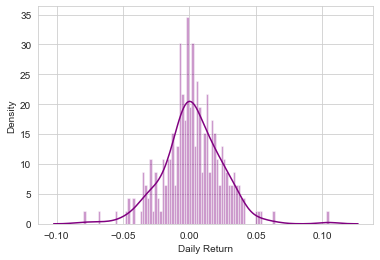

In [12]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

<AxesSubplot:>

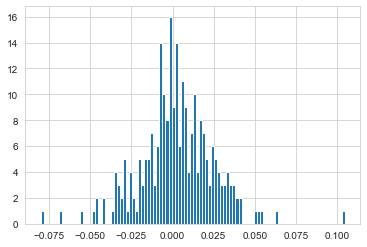

In [13]:
AAPL['Daily Return'].hist(bins=100)

In [14]:
closing_df =DataReader(tech_list,'yahoo',start,end)['Adj Close']


In [15]:
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-18,78.212997,1383.939941,183.049850,2426.260010
2020-05-19,77.761040,1373.484985,181.782730,2449.330078
2020-05-20,79.273354,1406.719971,184.304169,2497.939941
2020-05-21,78.682327,1402.800049,182.090454,2446.739990
2020-05-22,79.188927,1410.420044,182.169861,2436.879883
...,...,...,...,...
2021-05-10,126.849998,2341.659912,247.179993,3190.489990
2021-05-11,125.910004,2308.760010,246.229996,3223.909912
2021-05-12,122.769997,2239.080078,239.000000,3151.939941


In [16]:
tech_rets = closing_df.pct_change()

In [17]:
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-18,NaN,NaN,NaN,NaN
2020-05-19,-0.005779,-0.007554,-0.006922,0.009508
2020-05-20,0.019448,0.024198,0.013871,0.019846
2020-05-21,-0.007456,-0.002787,-0.012011,-0.020497
2020-05-22,0.006439,0.005432,0.000436,-0.004030
...,...,...,...,...
2021-05-10,-0.025805,-0.023775,-0.020914,-0.030721
2021-05-11,-0.007410,-0.014050,-0.003843,0.010475
2021-05-12,-0.024939,-0.030181,-0.029363,-0.022324


C:\Users\hansm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


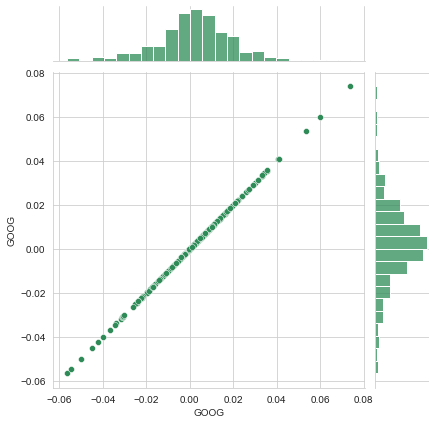

In [18]:
sns.jointplot('GOOG','GOOG',tech_rets, kind ='scatter',color='seagreen')

C:\Users\hansm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


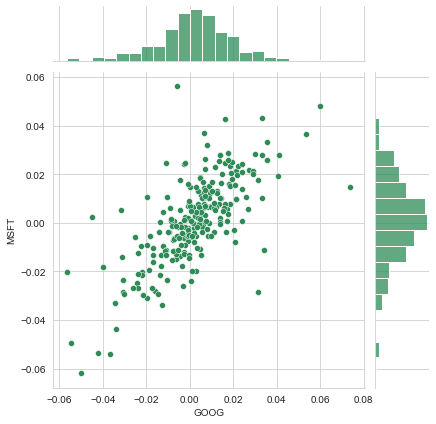

In [19]:
sns.jointplot('GOOG','MSFT',tech_rets, kind ='scatter',color='seagreen')



In [20]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-18,NaN,NaN,NaN,NaN
2020-05-19,-0.005779,-0.007554,-0.006922,0.009508
2020-05-20,0.019448,0.024198,0.013871,0.019846
2020-05-21,-0.007456,-0.002787,-0.012011,-0.020497
2020-05-22,0.006439,0.005432,0.000436,-0.004030


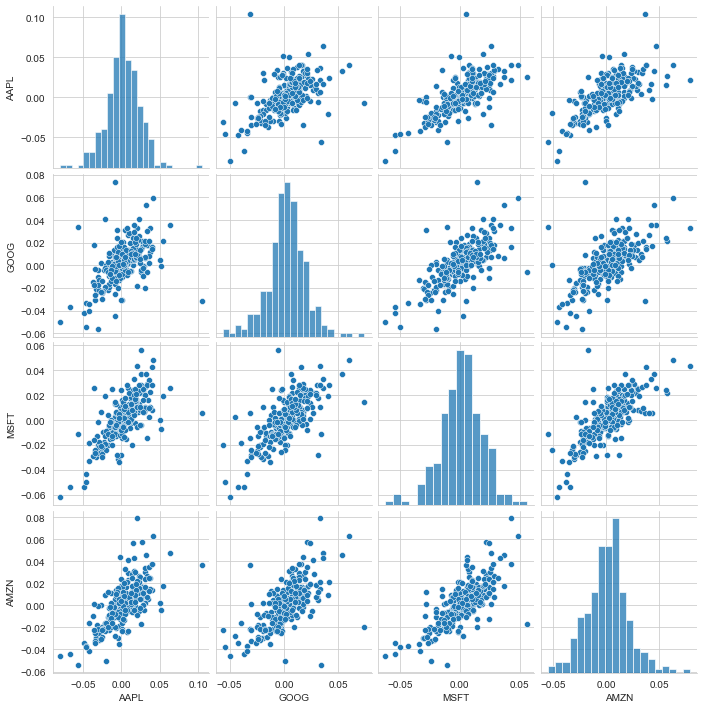

In [21]:
sns.pairplot(tech_rets.dropna())

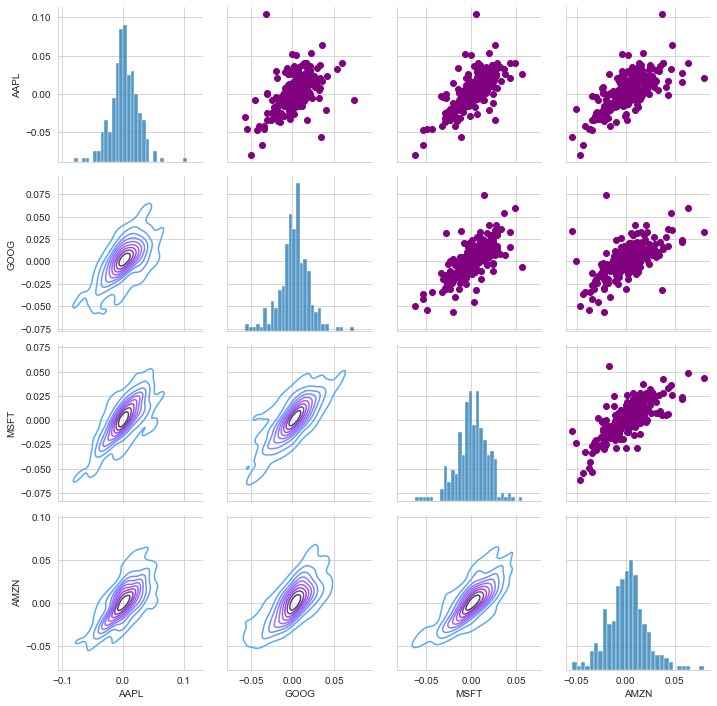

In [22]:
returns_fig =sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(sns.histplot,bins=30)

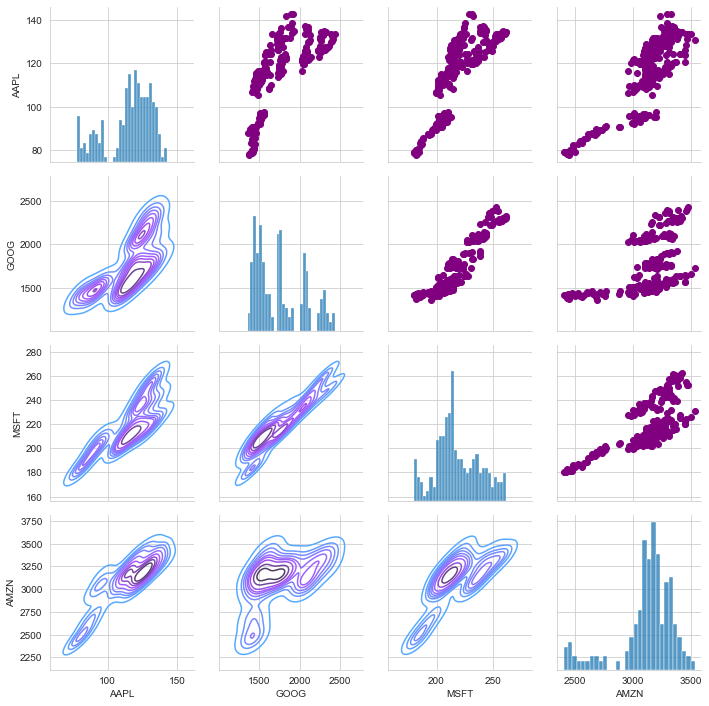

In [23]:
returns_fig =sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(sns.histplot,bins=30)

Symbols      AAPL      GOOG      MSFT      AMZN
Symbols                                        
AAPL     1.000000  0.517118  0.699435  0.695479
GOOG     0.517118  1.000000  0.705683  0.627310
MSFT     0.699435  0.705683  1.000000  0.744933
AMZN     0.695479  0.627310  0.744933  1.000000


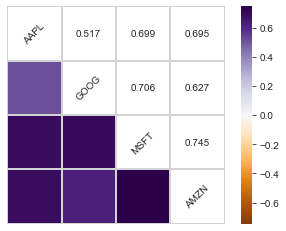

In [24]:
# Compute the correlation matrix
corr = tech_rets.dropna().corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,(i+0.5), corr.columns[i], ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,(i+0.5),s,
            ha="center", va="center")
ax.axis("off")
plt.show()

Symbols      AAPL      GOOG      MSFT      AMZN
Symbols                                        
AAPL     1.000000  0.725020  0.824771  0.858761
GOOG     0.725020  1.000000  0.930754  0.530215
MSFT     0.824771  0.930754  1.000000  0.734685
AMZN     0.858761  0.530215  0.734685  1.000000


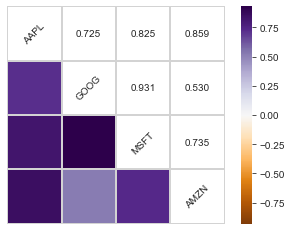

In [25]:
# Compute the correlation matrix
corr = closing_df.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,(i+0.5), corr.columns[i], ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,(i+0.5),s,
            ha="center", va="center")
ax.axis("off")
plt.show()

RISK ANALYSIS

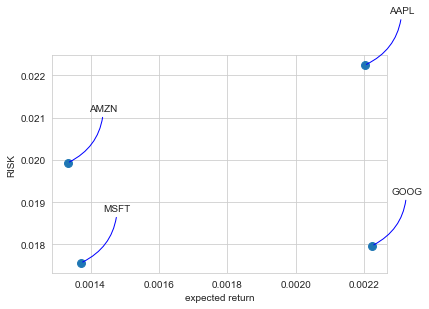

In [28]:
rets =tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('expected return')
plt.ylabel('RISK')

for label, x, y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy =(x,y),xytext=(50,50),
        textcoords='offset points', ha='right',va='bottom',
        arrowprops= dict(arrowstyle='-',connectionstyle ='arc3,rad=-0.3',color='blue',)
    )

VALUE AT RISK (amount of money willing to lose) boostrap method, quantile et pourcentile
intervalle de confiance


C:\Users\hansm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

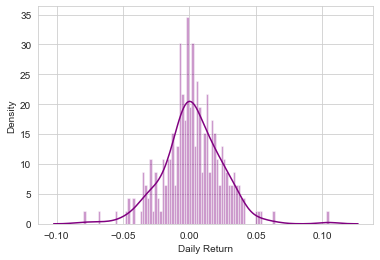

In [30]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [31]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-19,-0.005779,-0.007554,-0.006922,0.009508
2020-05-20,0.019448,0.024198,0.013871,0.019846
2020-05-21,-0.007456,-0.002787,-0.012011,-0.020497
2020-05-22,0.006439,0.005432,0.000436,-0.004030
2020-05-26,-0.006773,0.004679,-0.010572,-0.006164


In [32]:
rets['AAPL'].quantile(0.05)

-0.03379551311015612

Monte carlo method



In [36]:
days =365
dt =1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']


In [44]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    shock = np.zeros(days)
    drift = np.zeros(days)
    price[0] =start_price

    for x in range(1,days):
        shock[x] =np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x]= price[x-1]+ (price[x-1]*(drift[x]+shock[x]))
    return price

In [38]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-18,1392.324951,1354.250000,1361.750000,1383.939941,1822400,1383.939941
2020-05-19,1392.000000,1373.484985,1386.996948,1373.484985,1280600,1373.484985
2020-05-20,1410.420044,1387.250000,1389.579956,1406.719971,1655400,1406.719971
2020-05-21,1415.489990,1393.449951,1408.000000,1402.800049,1385000,1402.800049
2020-05-22,1412.760010,1391.829956,1396.709961,1410.420044,1309400,1410.420044


Text(0.5, 1.0, 'Monte carlo analysis for google')

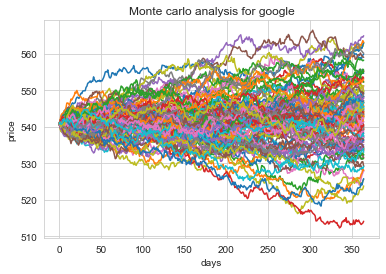

In [48]:
start_price =540.74
for run in range(100):
    x = stock_monte_carlo(start_price,days,mu,sigma)
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('days')
plt.ylabel('price')
plt.title('Monte carlo analysis for google')

In [51]:
runs =10000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] =stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final distribution for google stock after 365 days')

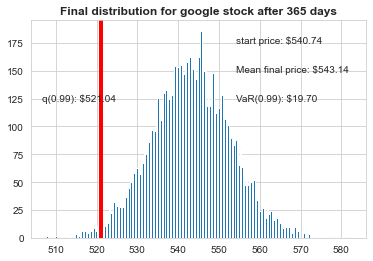

In [54]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)
plt.figtext(0.6,0.8, s= 'start price: $%.2f' %start_price)
plt.figtext(0.6,0.7, s= 'Mean final price: $%.2f' %simulations.mean())
plt.figtext(0.6,0.6, s= 'VaR(0.99): $%.2f' %(start_price-q))
plt.figtext(0.15,0.6, s= 'q(0.99): $%.2f' %q)
plt.axvline(x=q,linewidth=4,color='r')
plt.title(u'Final distribution for google stock after %s days' %days, weight='bold')